# Waste management using CNN model

### Installing necessary libraries for model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing necessary libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

### Providing path to accses dataset

In [2]:
train_path = "DATASET/TRAIN"
test_path = "DATASET/TEST"

### Importing TensorFlow libraries

In [3]:
#Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob 

### Visualizing the data

In [4]:
# visualizing the data
from cv2 import cvtColor

x_data = []
y_data = []

for category in glob(train_path +'/*'):
    for file in tqdm(glob(category +'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [01:35<00:00, 105.13it/s]


### Checking data shape


In [5]:
data.shape

(22564, 2)

### Representation of the data in Pie chart 

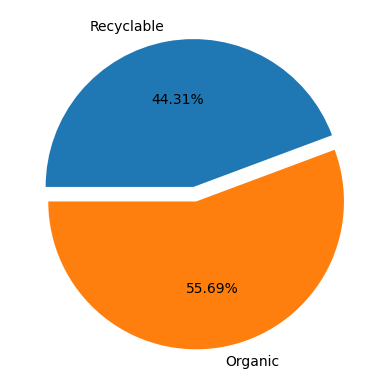

In [6]:
#pie chart representation of the data
colors = ['#ff7f0e', '#1f77b4']
plt.pie(data.label.value_counts(), labels= ['Organic', 'Recyclable'], autopct='%0.2f%%', colors = colors, startangle=180, explode=(0.05, 0.05))
plt.show()

### Visualizes random images from dataset

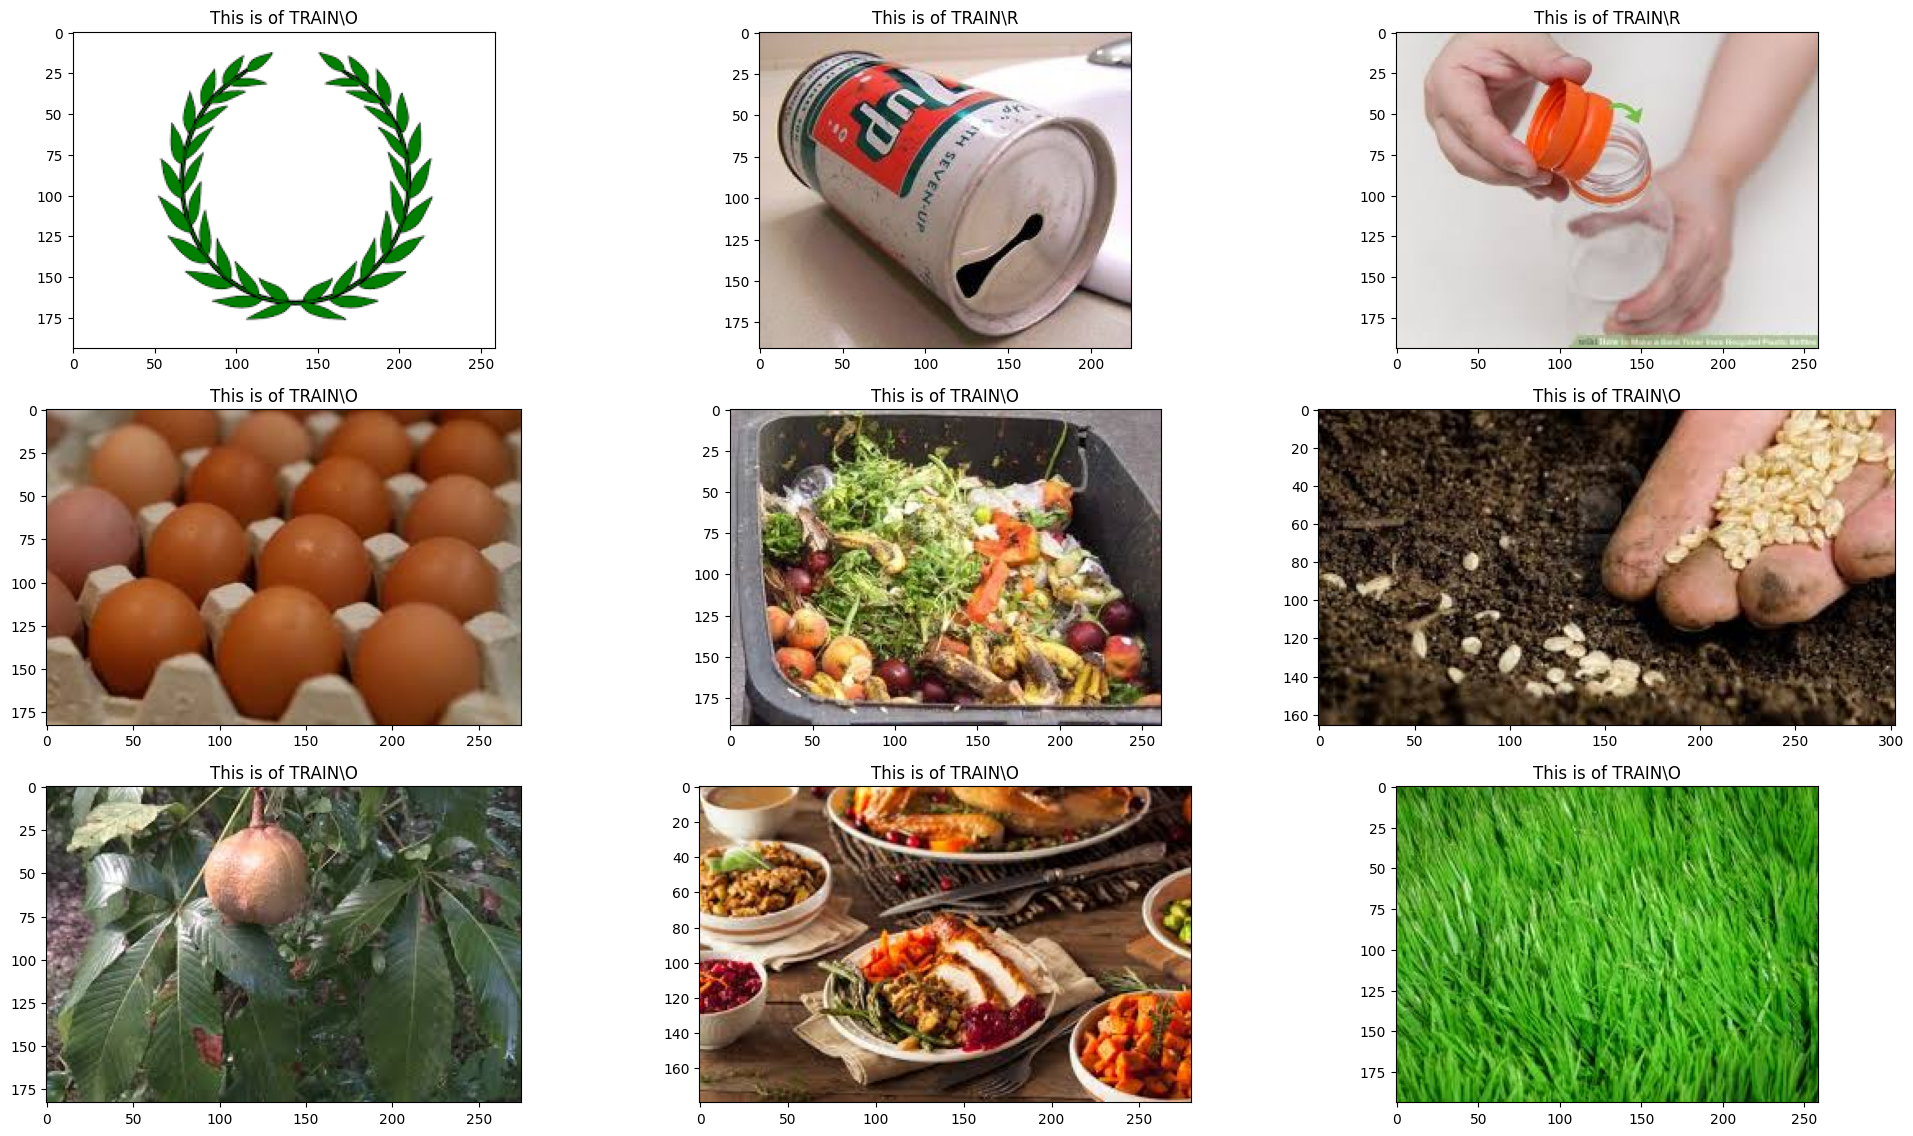

In [7]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

### Designing CNN model - Convolutional Neural network

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

### Data augmentation for training and testing

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


### Training CNN Model 

In [14]:
hist = model.fit(
    train_generator, 
    epochs = 8, 
    validation_data = test_generator
)

Epoch 1/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.6871 - loss: 0.6958 - val_accuracy: 0.8599 - val_loss: 0.3525
Epoch 2/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.8210 - loss: 0.4322 - val_accuracy: 0.8739 - val_loss: 0.3207
Epoch 3/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.8487 - loss: 0.3738 - val_accuracy: 0.8989 - val_loss: 0.2757
Epoch 4/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.8583 - loss: 0.3538 - val_accuracy: 0.8870 - val_loss: 0.2996
Epoch 5/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 470s 5s/step - accuracy: 0.8622 - loss: 0.3471 - val_accuracy: 0.8878 - val_loss: 0.2851
Epoch 6/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 336s 4s/step - accuracy: 0.8728 - loss: 0.3202 - val_accuracy: 0.8942 - val_loss: 0.2753
Epoch 7/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 323s 4s/step - accuracy: 0.8901 - loss: 0.2785 - val_accuracy: 0.9009 - val_loss: 0.2704
Epoch 8/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 326s 4s/step - accuracy: 0.9031 - loss: 0.2460 - val_accuracy: 0.8965 - val_loss:

###  Accuracy in Graph

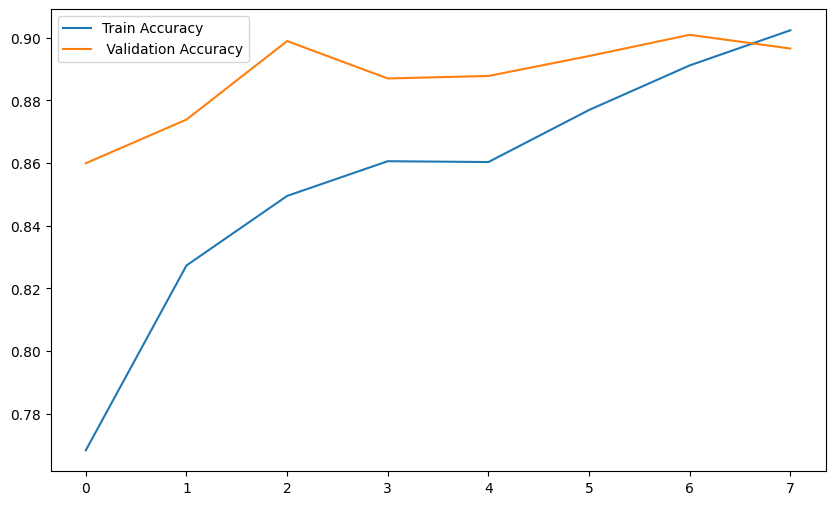

In [15]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show()

###  Loss in Graph

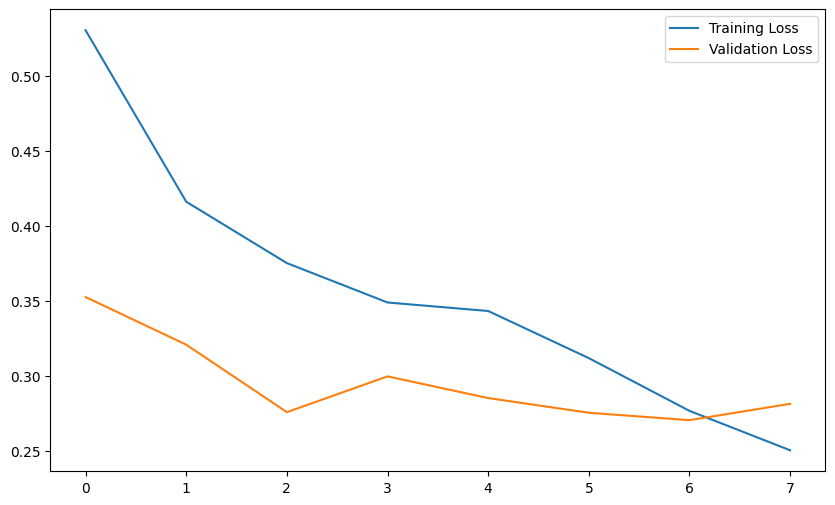

In [16]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### Function to Predict Waste Type

In [17]:
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()

  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  
  result = np.argmax(model.predict(img))
  
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')


### Testing the Model on Sample Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
The image shown is Organic Waste


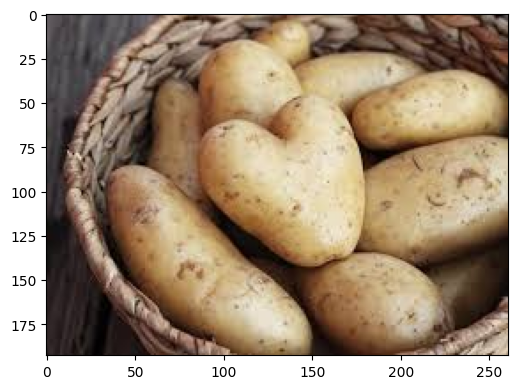

In [18]:
test_img = cv2.imread("E:\Ai GreenSkill Internship\DATASET\TEST\O\O_13109.jpg")
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
The image shown is Recyclable Waste


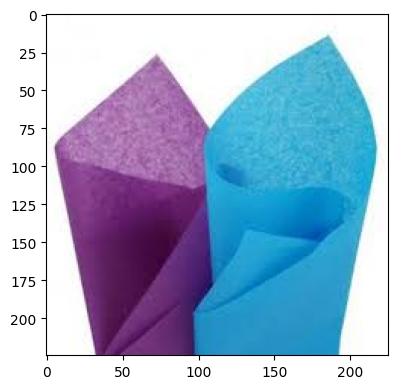

In [19]:
test_img = cv2.imread("E:\Ai GreenSkill Internship\DATASET\TEST\R\R_10753.jpg")
predict_fun(test_img)